# Exercises week 35

## Deriving and Implementing Ordinary Least Squares

This week you will be deriving the analytical expressions for linear regression, building up the model from scratch. This will include taking several derivatives of products of vectors and matrices. Such derivatives are central to the optimization of many machine learning models. Although we will often use automatic differentiation in actual calculations, to be able to have analytical expressions is extremely helpful in case we have simpler derivatives as well as when we analyze various properties (like second derivatives) of the chosen cost functions.

Vectors are always written as boldfaced lower case letters and matrices as upper case boldfaced letters. You will find useful the notes from week 35 on derivatives of vectors and matrices. See also the textbook of Faisal at al, chapter 5 and in particular sections 5.3-5.5 at <https://github.com/CompPhysics/MachineLearning/blob/master/doc/Textbooks/MathMLbook.pdf>

### Learning goals

After completing these exercises, you will know how to
- Take the derivatives of simple products between vectors and matrices
- Implement OLS using the analytical expressions
- Create a feature matrix from a set of data
- Create a feature matrix for a polynomial model
- Evaluate the MSE score of various model on training and test data, and comparing their performance

### Deliverables

Complete the following exercises while working in a jupyter notebook. Then, in canvas, include
- The jupyter notebook with the exercises completed
- An exported PDF of the notebook (https://code.visualstudio.com/docs/datascience/jupyter-notebooks#_export-your-jupyter-notebook)

## How to take derivatives of Matrix-Vector expressions

In these exercises it is always useful to write out with summation indices the various quantities. Take also a look at the weekly slides from week 35 and the various examples included there.

As an example, consider the function

$$
f(\boldsymbol{x}) =\boldsymbol{A}\boldsymbol{x},
$$

which reads for a specific component $f_i$ (we define the matrix $\boldsymbol{A}$ to have dimension $n\times n$ and the vector $\boldsymbol{x}$ to have length $n$)

$$
f_i =\sum_{j=0}^{n-1}a_{ij}x_j,
$$

which leads to

$$
\frac{\partial f_i}{\partial x_j}= a_{ij},
$$

and written out in terms of the vector $\boldsymbol{x}$ we have

$$
\frac{\partial f(\boldsymbol{x})}{\partial \boldsymbol{x}}= \boldsymbol{A}.
$$

## Exercise 1 - Finding the derivative of Matrix-Vector expressions

**a)** Consider the expression

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}},
$$

Where $\boldsymbol{a}$ and $\boldsymbol{x}$ are column-vectors with length $n$.

What is the *shape* of the expression we are taking the derivative of?  

ANSWER: Scalar.

What is the *shape* of the thing we are taking the derivative with respect to?

ANSWER: Column vector of length n (matrix of dimension n × 1).

What is the *shape* of the result of the expression?

ANSWER: Row vector (matrix of dimension 1 × n).

**b)** Show that

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}} = \boldsymbol{a}^T,
$$

ANSWER:
First, we have that
$$
\boldsymbol{a}^T\boldsymbol{x} = \sum_{i=0}^{n-1}a_ix_i
$$
So, the derivative of that expression with respect to an element of $\boldsymbol{x}$ is given by
$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial x_i}= a_i
$$
Finally:
$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}}= \boldsymbol{a}^T
$$


**c)** Show that

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a})}{\partial \boldsymbol{a}} = \boldsymbol{a}^T(\boldsymbol{A}+\boldsymbol{A}^T),
$$

ANSWER:
First, we have that $\boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a}$ is an scalar:
$$
\boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a} = \sum_{i=0}^{n-1}\sum_{j=0}^{n-1}a_i A_{ij}a_j
$$
If we take the derivative of $\boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a}$ with respect to one element of $\boldsymbol{a}$, we obtain:
$$
\frac{\partial \boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a}}{\partial a_k}  = \sum_{j=0}^{n-1}A_{kj}a_j + \sum_{i=0}^{n-1}A_{ik}a_i
$$
Extrapolating to all elements of $\boldsymbol{a}$, we have that the sums can be expressed as:
$$
\frac{\partial \alpha}{\partial \boldsymbol{x}}  = \boldsymbol{a}^T\left(\boldsymbol{A}+\boldsymbol{A}^T\right)
$$


## Exercise 2 - Deriving the expression for OLS

The ordinary least squares method finds the parameters $\boldsymbol{\theta}$ which minimizes the squared error between our model $\boldsymbol{X\theta}$ and the true values $\boldsymbol{y}$.

To find the parameters $\boldsymbol{\theta}$ which minimizes this error, we take the derivative of the squared error expression with respect to $\boldsymbol{\theta}$, and set it equal to 0.

**a)** Very briefly explain why the approach above finds the parameters $\boldsymbol{\theta}$ which minimizes this error.

We typically write the squared error as

$$
\vert\vert\boldsymbol{y} - \boldsymbol{X\theta}\vert\vert^2
$$

which we can rewrite in matrix-vector form as

$$
\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)
$$

ANSWER:
This method is able to find the parameters $\boldsymbol{\theta}$ because, since the squared error is a convex function, the point where its gradient is zero corresponds to the global minimum.

**b)** If $\boldsymbol{X}$ is invertible, what is the expression for the optimal parameters $\boldsymbol{\theta}$? (**Hint:** Don't compute any derivatives, but solve $\boldsymbol{X\theta}=\boldsymbol{y}$ for $\boldsymbol{\theta}$)

ANSWER:

If $\boldsymbol{X}$ is invertible, we can solve the equation $\boldsymbol{X\theta} = \boldsymbol{y}$ directly for $\boldsymbol{\theta}$. First, we multiply both sides of the equation by the inverse of $\boldsymbol{X}$:
$$
\boldsymbol{X}^{-1} \boldsymbol{X\theta} = \boldsymbol{X}^{-1} \boldsymbol{y}
$$
Since $\boldsymbol{X}^{-1} \boldsymbol{X}$ is the identity matrix $\boldsymbol{I}$, we obtain the following expression for the optimal parameters:
$$
\boldsymbol{\theta} = \boldsymbol{X}^{-1} \boldsymbol{y}
$$

**c)** Show that

$$
\frac{\partial \left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)}{\partial \boldsymbol{s}} = -2\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\boldsymbol{A},
$$

ANSWER:

Defining $\boldsymbol{u} = \boldsymbol{x} - \boldsymbol{A}\boldsymbol{s}$, we can rewrite the problem as:
$$
\frac{\partial \boldsymbol{u}^T \boldsymbol{u}}{\partial \boldsymbol{s}}
$$
Using the chain rule:
$$
\frac{\partial \boldsymbol{u}^T \boldsymbol{u}}{\partial \boldsymbol{s}} = \frac{\partial \boldsymbol{u}^T \boldsymbol{u}}{\partial \bold{u}} \cdot \frac{\partial \bold{u}}{\partial \bold{s}} = 2\bold{u} \cdot \frac{\partial \boldsymbol{u}}{\partial \boldsymbol{s}}
$$
Since $\boldsymbol{u} = \boldsymbol{x} - \boldsymbol{A}\boldsymbol{s}$, we have that:
$$
\frac{\partial \boldsymbol{u}}{\partial \boldsymbol{s}} = -\boldsymbol{A}
$$
Going back to the previous expression:
$$
\frac{\partial \boldsymbol{u}^T \boldsymbol{u}}{\partial \boldsymbol{s}} = 2\bold{u} \cdot \frac{\partial \boldsymbol{u}}{\partial \boldsymbol{s}} = 2\bold{u} \cdot -\boldsymbol{A} = -2 \boldsymbol{u}^T \boldsymbol{A}
$$
Substituting $\boldsymbol{u}$ by its original expression:
$$
\frac{\partial \left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)}{\partial \boldsymbol{s}}  = -2 \left(\boldsymbol{x} - \boldsymbol{A} \boldsymbol{s}\right)^T \boldsymbol{A}
$$

**d)** Using the expression from **c)**, but substituting back in $\boldsymbol{\theta}$, $\boldsymbol{y}$ and $\boldsymbol{X}$, find the expression for the optimal parameters $\boldsymbol{\theta}$ in the case that $\boldsymbol{X}$ is not invertible, but $\boldsymbol{X^T X}$ is, which is most often the case.

$$
\boldsymbol{\hat{\theta}_{OLS}} = ...
$$

ANSWER:

Substituting back in $\boldsymbol{\theta}$, $\boldsymbol{y}$ and $\boldsymbol{X}$, we have:
$$
\frac{\partial \left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)}{\partial \boldsymbol{\theta}}  = -2 \left(\boldsymbol{y} - \boldsymbol{X} \boldsymbol{\theta}\right)^T \boldsymbol{X}
$$
The optimal parameters $\boldsymbol{\theta}$ are obtained by minimizing the error between our model $\boldsymbol{X\theta}$ and the true values $\boldsymbol{y}$. As discussed before, this is done by taking the derivative defined above, and setting it equal to 0. We then obtain:
$$
\left(\boldsymbol{y} - \boldsymbol{X} \boldsymbol{\theta}\right)^T \boldsymbol{X} =  \boldsymbol{X}^T \left(\boldsymbol{y} - \boldsymbol{X} \boldsymbol{\theta}\right) = 0
$$
Rewriting it and isolating $\boldsymbol{\theta}$, we get:
$$
\left(\boldsymbol{y} - \boldsymbol{X} \boldsymbol{\theta}\right)^T \boldsymbol{X} =  \boldsymbol{X}^T \left(\boldsymbol{y} - \boldsymbol{X} \boldsymbol{\theta}\right) = 0
$$

$$
\boldsymbol{X}^T \boldsymbol{y} - \boldsymbol{X}^T \boldsymbol{X} \boldsymbol{\theta}= 0
$$

$$
\boldsymbol{X}^T \boldsymbol{y} = \boldsymbol{X}^T \boldsymbol{X} \boldsymbol{\theta}
$$

$$
\boldsymbol{\theta} = (\boldsymbol{X}^T \boldsymbol{X})^{-1} \boldsymbol{X}^T \boldsymbol{y}
$$

## Exercise 3 - Creating feature matrix and implementing OLS using the analytical expression

With the expression for $\boldsymbol{\hat{\theta}_{OLS}}$, you now have what you need to implement OLS regression with your input data and target data $\boldsymbol{y}$. But before you can do that, you need to set up you input data as a feature matrix $\boldsymbol{X}$.

In a feature matrix, each row is a datapoint and each column is a feature of that data. If you want to predict someones spending based on their income and number of children, for instance, you would create a row for each person in your dataset, with the montly income and the number of children as columns.

We typically also include an intercept in our models. The intercept is a value that is added to our prediction regardless of the value of the other features. The intercept tries to account for constant effects in our data that are not dependant on anything else. In our current example, the intercept could account for living expenses which are typical regardless of income or childcare expenses.

We calculate the optimal intercept by including a feature with the constant value of 1 in our model, which is then multplied by some parameter $\theta_0$ from the OLS method into the optimal intercept value (which will be $\theta_0$). In practice, we include the intercept in our model by adding a column of ones to the start of our feature matrix.

In [58]:
import numpy as np

In [59]:
n = 20
income = np.array([116., 161., 167., 118., 172., 163., 179., 173., 162., 116., 101., 176., 178., 172., 143., 135., 160., 101., 149., 125.])
children = np.array([5, 3, 0, 4, 5, 3, 0, 4, 4, 3, 3, 5, 1, 0, 2, 3, 2, 1, 5, 4])
spending = np.array([152., 141., 102., 136., 161., 129.,  99., 159., 160., 107.,  98., 164., 121.,  93., 112., 127., 117.,  69., 156., 131.])


**a)** Create a feature matrix $\boldsymbol{X}$ for the features income and children, including an intercept column of ones at the start.

In [60]:
X = np.zeros((n, 3))
X[:, 0] = 1
X[:, 1] = income
X[:, 2] = children

**b)** Use the expression from **3d)** to find the optimal parameters $\boldsymbol{\hat{\beta}_{OLS}}$ for predicting spending based on these features. Create a function for this operation, as you are going to need to use it a lot.

[ 9.12808583  0.5119025  14.60743095]


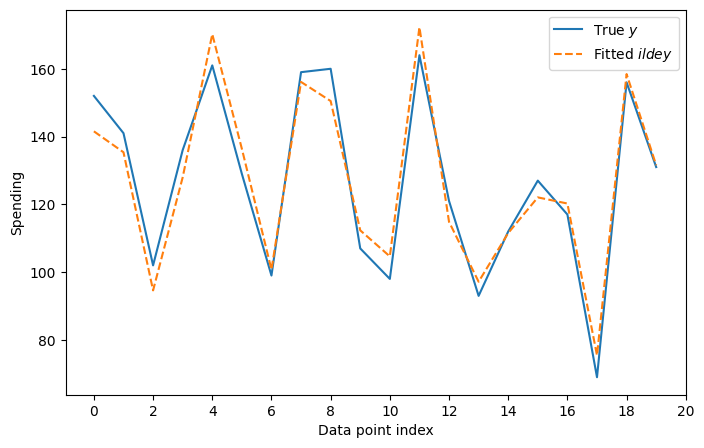

In [66]:
import matplotlib.pyplot as plt

def OLS_parameters(X, y):
    xtx_inv = np.linalg.inv(X.T @ X)
    return xtx_inv @ X.T @ y

beta = OLS_parameters(X, spending)
print(beta)

y_tilde = X @ beta
plt.figure(figsize=(8, 5))
plt.plot(spending, label='True $y$')
plt.plot(y_tilde, label='Fitted $\tilde{y}$', linestyle='--')
plt.xlabel('Data point index')
plt.ylabel('Spending')
plt.legend()
plt.xticks(np.arange(0, len(spending)+1, 2))
plt.show()

## Exercise 4 - Fitting a polynomial

In this course, we typically do linear regression using polynomials, though in real world applications it is also very common to make linear models based on measured features like you did in the previous exercise.

When fitting a polynomial with linear regression, we make each polynomial degree($x, x^2, x^3, ..., x^p$) its own feature.

In [107]:
n = 100
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1)

**a)** Create a feature matrix $\boldsymbol{X}$ for the features $x, x^2, x^3, x^4, x^5$, including an intercept column of ones at the start. Make this into a function, as you will do this a lot over the next weeks.

In [108]:
def polynomial_features(x, p):
    n = len(x)
    X = np.zeros((n, p + 1))
    for i in range(p + 1):
        X[:, i] = x**i
    return X

X = polynomial_features(x, 5)
print('Shape of X:', X.shape)

Shape of X: (100, 6)


**b)** Use the expression from **3d)** to find the optimal parameters $\boldsymbol{\hat{\beta}_{OLS}}$ for predicting $\boldsymbol{y}$ based on these features. If you have done everything right so far, this code will not need changing.

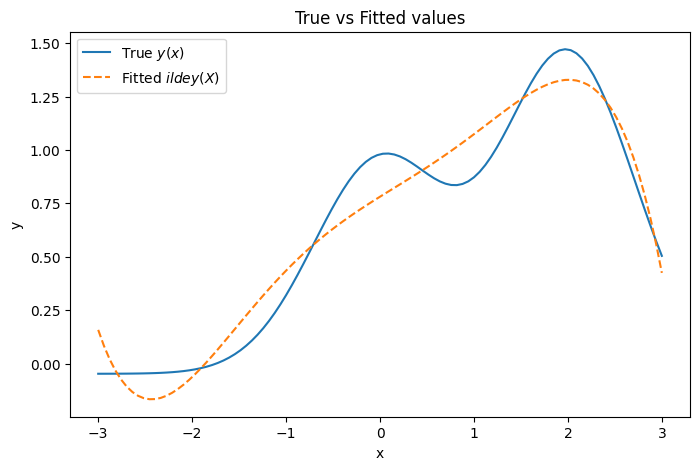

In [109]:
beta = OLS_parameters(X, y)
y_tilde = X @ beta
plt.figure(figsize=(8, 5))
plt.plot(x, y, label='True $y(x)$')
plt.plot(x, y_tilde, label='Fitted $\tilde{y}(X)$', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('True vs Fitted values')
plt.show()

**c)** Like in exercise 4 last week, split your feature matrix and target data into a training split and test split.

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**d)** Train your model on the training data(find the parameters which best fit) and compute the MSE on both the training and test data.

In [111]:
beta = OLS_parameters(X_train, y_train)
y_tilde_train = X_train @ beta
y_tilde_test = X_test @ beta

mse_train = np.mean(np.mean((y_train - y_tilde_train) ** 2))
mse_test = np.mean(np.mean((y_test - y_tilde_test) ** 2))
print("MSE (train):", mse_train)
print("MSE (test):", mse_test)

MSE (train): 0.012534255669400063
MSE (test): 0.02054743864717211


**e)** Do the same for each polynomial degree from 2 to 10, and plot the MSE on both the training and test data as a function of polynomial degree. The aim is to reproduce Figure 2.11 of [Hastie et al](https://github.com/CompPhysics/MLErasmus/blob/master/doc/Textbooks/elementsstat.pdf). Feel free to read the discussions leading to figure 2.11 of Hastie et al. 

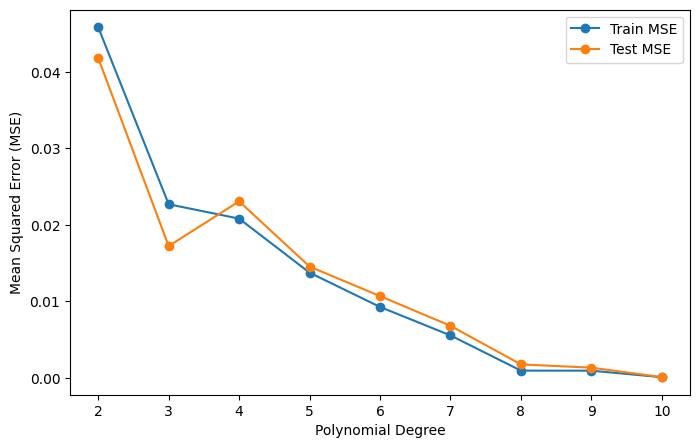

In [121]:
mse_test_list = []
mse_train_list = []
degrees = range(2, 11)
for n in degrees:
    X_poly = polynomial_features(x, n)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2)
    beta = OLS_parameters(X_train, y_train)
    y_tilde_train = X_train @ beta
    y_tilde_test = X_test @ beta
    mse_train = np.mean(np.mean((y_train - y_tilde_train) ** 2))
    mse_test = np.mean(np.mean((y_test - y_tilde_test) ** 2))
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)

plt.figure(figsize=(8, 5))
plt.plot(degrees, mse_train_list, label='Train MSE', marker='o')
plt.plot(degrees, mse_test_list, label='Test MSE', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

**f)** Interpret the graph. Why do the lines move as they do? What does it tell us about model performance and generalizability?

ANSWER:

We expect to reach an overfitting regime as we increase the polynomial degree, in which the MSE on the training data is almost zero and the MSE on the test data keeps increasing. This happens because we are fitting the model to perfection based on our training data, but the errors on outliers present on the test data are increasing.

## Exercise 5 - Comparing your code with sklearn

When implementing different algorithms for the first time, it can be helpful to double check your results with established implementations before you go on to add more complexity.

**a)** Make sure your `polynomial_features` function creates the same feature matrix as sklearns PolynomialFeatures.

(https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [49]:
from sklearn.preprocessing import PolynomialFeatures

for n in range(2, 11):
    X_mine = polynomial_features(x, n)
    X_sklearn = PolynomialFeatures(degree=n)
    assert np.allclose(X_mine, X_sklearn.fit_transform(x.reshape(-1, 1)))   

**b)** Make sure your `OLS_parameters` function computes the same parameters as sklearns LinearRegression with fit_intercept set to False, since the intercept is included in the feature matrix. Use `your_model_object.coef_` to extract the computed parameters.

(https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [56]:
from sklearn.linear_model import LinearRegression

for n in range(2, 11):
    X_poly = polynomial_features(x, n)
    model = LinearRegression(fit_intercept=False).fit(X_poly, y)
    beta_sklearn = model.coef_
    beta_mine = OLS_parameters(X_poly, y)
    assert np.allclose(beta_sklearn, beta_mine)